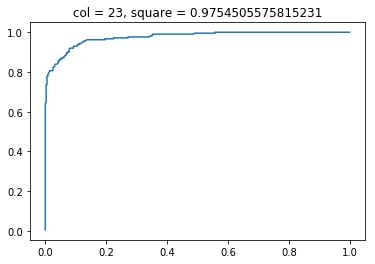

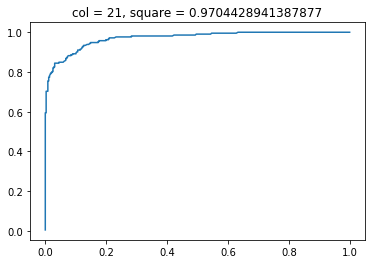

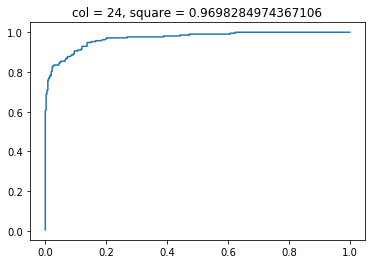

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from operator import itemgetter


df = pd.read_csv('/Users/dashabalashova/1_1_5_ML_Bioinf/data/cancer.csv')
df['label'] = df['label'].map({'M':1, 'B':0})
#df = df.sample(n=20, random_state=1)
#dict_1 = {'M':1, 'B':0}


def S(col):
    R=[]
    for xx in sorted(list(set(df[col]))):
        df.loc[df[col] < xx, 'leaf'] = 0 
        df.loc[df[col] >= xx, 'leaf'] = 1
        df.loc[((df['label']==1) & (df['leaf']==1)), 'res'] = 'TP'
        df.loc[((df['label']==0) & (df['leaf']==1)), 'res'] = 'FP'
        df.loc[((df['label']==1) & (df['leaf']==0)), 'res'] = 'FN'
        df.loc[((df['label']==0) & (df['leaf']==0)), 'res'] = 'TN'
        TP = (df.res == 'TP').sum()
        FP = (df.res == 'FP').sum()
        FN = (df.res == 'FN').sum()
        TN = (df.res == 'TN').sum()
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        R.append([FPR, TPR])
    R = sorted(R, key=itemgetter(0,1))
    return np.trapz(list(zip(*R))[1], x = list(zip(*R))[0]), R
        
    
Sq = []
for col in list(df.drop('label',axis=1).columns.values):
    Sq.append([col, S(col)[0]])

Sq = sorted(Sq, key=itemgetter(1), reverse=True)

for col in list(zip(*Sq))[0][:3]:
    plt.figure()
    R = S(col)
    plt.plot(list(zip(*R[1]))[0], list(zip(*R[1]))[1])
    plt.title('col = '+str(col)+', square = '+str(R[0]))
    plt.show()